In [196]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report

In [197]:
#training dataset
df = pd.read_csv('/content/Tomato_Alternaria_C07_2022.csv')

In [198]:
df.head()

,sample_date,time,rel_hum_hourly,output_prim,Disease
0,4/2/2021,0:00:00,66.5,0,0
1,4/2/2021,1:00:00,69.5,0,0
2,4/2/2021,2:00:00,83.0,0,0
3,4/2/2021,3:00:00,83.0,0,0
4,4/2/2021,4:00:00,82.5,0,0


In [199]:
df.shape

(4223, 5)

In [200]:
df.isna().sum()

sample_date       0
time              0
rel_hum_hourly    0
output_prim       0
Disease           0
dtype: int64

In [201]:
df['sample_date'] = pd.to_datetime(df['sample_date'], format='%m/%d/%Y')

print(df)

     sample_date      time  rel_hum_hourly  output_prim  Disease
0     2021-04-02   0:00:00            66.5            0        0
1     2021-04-02   1:00:00            69.5            0        0
2     2021-04-02   2:00:00            83.0            0        0
3     2021-04-02   3:00:00            83.0            0        0
4     2021-04-02   4:00:00            82.5            0        0
...          ...       ...             ...          ...      ...
4218  2021-09-24  18:00:00             0.0            0        0
4219  2021-09-24  19:00:00             0.0            0        0
4220  2021-09-24  20:00:00             0.0            0        0
4221  2021-09-24  21:00:00             0.0            0        0
4222  2021-09-24  22:00:00             0.0            0        0

[4223 rows x 5 columns]


In [202]:
df.describe()

,rel_hum_hourly,output_prim,Disease
count,4223.000000,4223.000000,4223.000000
mean,56.031494,0.035283,0.018233
std,27.531420,0.184516,0.133811
min,0.000000,0.000000,0.000000
25%,43.500000,0.000000,0.000000
50%,61.000000,0.000000,0.000000
75%,77.000000,0.000000,0.000000
max,97.000000,1.000000,1.000000


In [203]:
df.columns

Index(['sample_date', 'time', 'rel_hum_hourly', 'output_prim', 'Disease'], dtype='object')

In [204]:
df.columns[df.isnull().any()]

Index([], dtype='object')

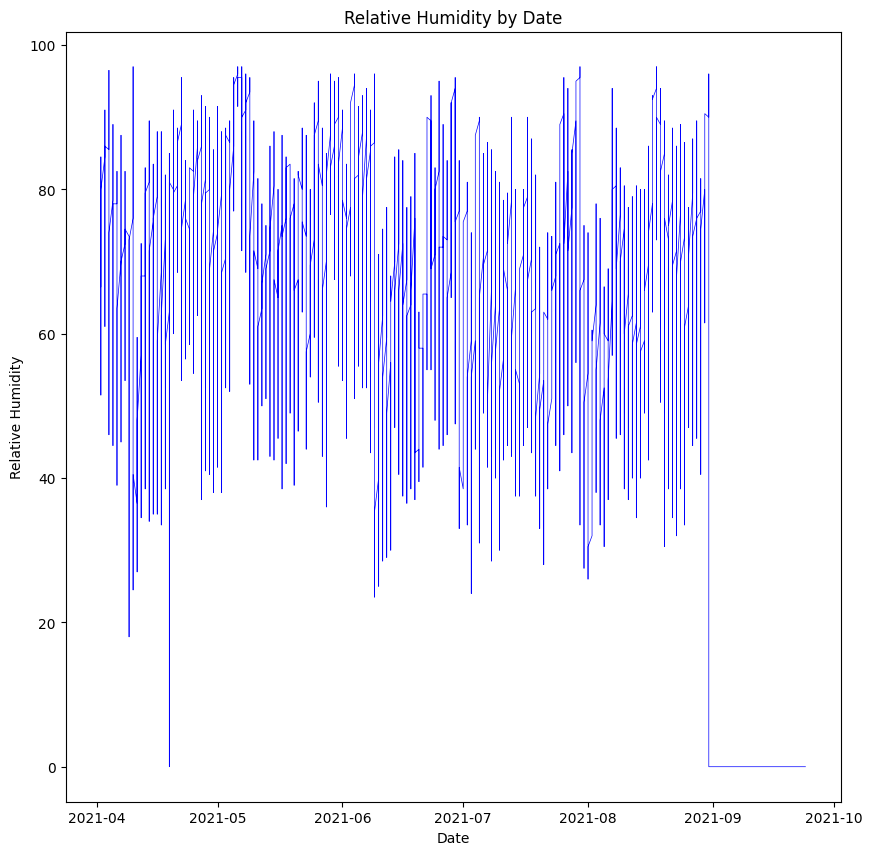

In [205]:
#  3d chart with date time and relative humidity

plt.figure(figsize=(10,10))
plt.plot(df['sample_date'],df['rel_hum_hourly'],color='blue',linewidth=0.5)
plt.xlabel('Date')
plt.ylabel('Relative Humidity')
plt.title('Relative Humidity by Date')
plt.show()


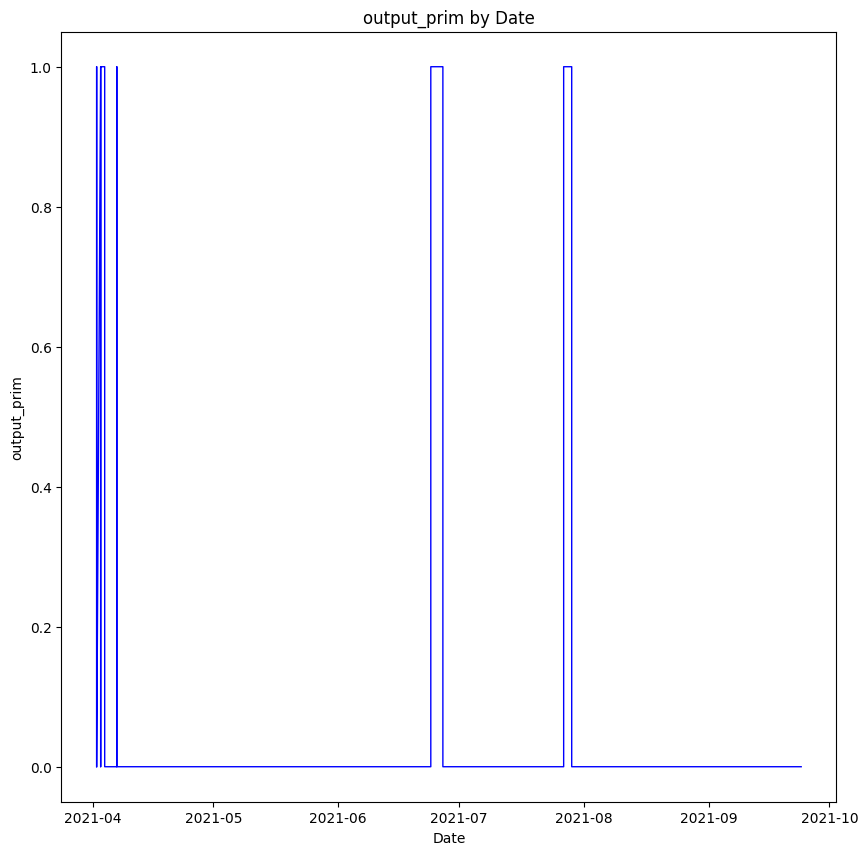

In [206]:
# 3d chart with date and relative humidity

plt.figure(figsize=(10,10))
plt.plot(df['sample_date'],df['output_prim'],color='blue',linewidth=1)
plt.xlabel('Date')
plt.ylabel('output_prim')
plt.title('output_prim by Date')
plt.show()


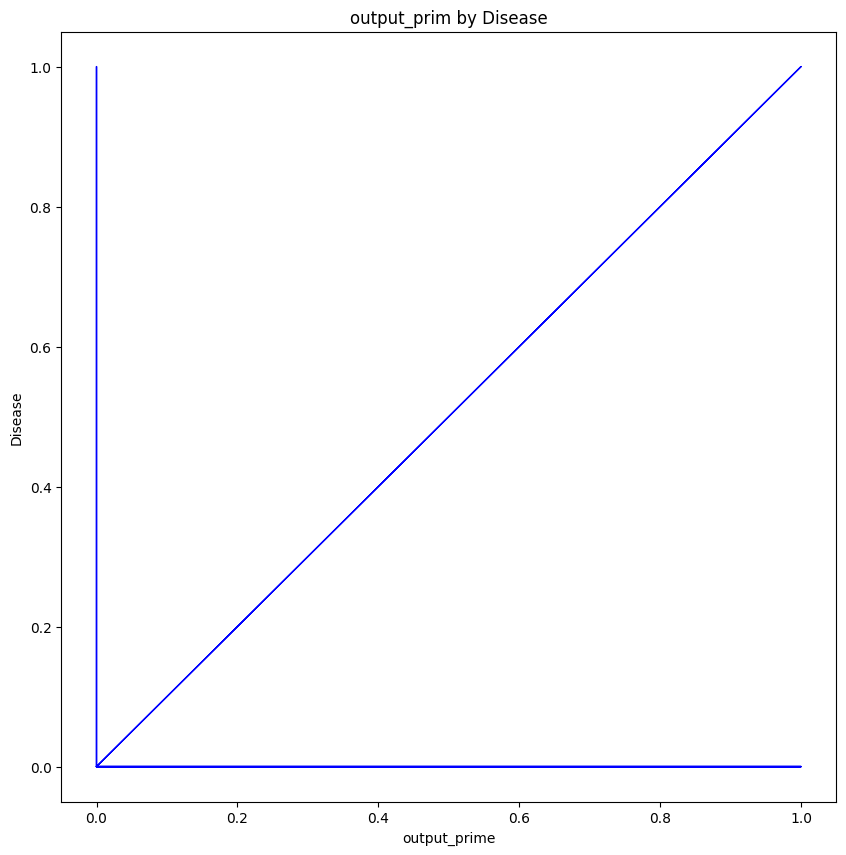

In [207]:
#  3d chart with date and output_prim

plt.figure(figsize=(10,10))
plt.plot(df['output_prim'],df['Disease'],color='blue',linewidth=1)
plt.xlabel('output_prime')
plt.ylabel('Disease')
plt.title('output_prim by Disease')
plt.show()


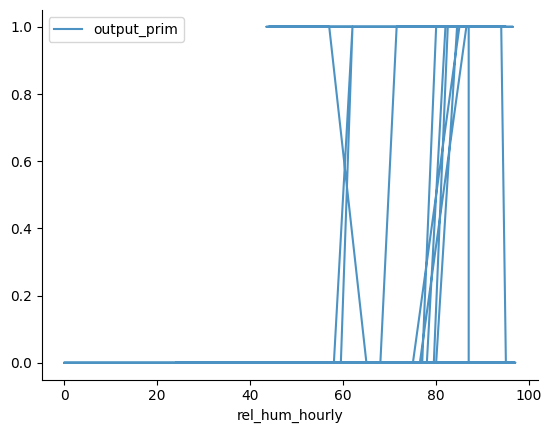

In [208]:
# line plot of output_prim and relative humidity

df.plot(kind='line', x='rel_hum_hourly', y='output_prim', alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)


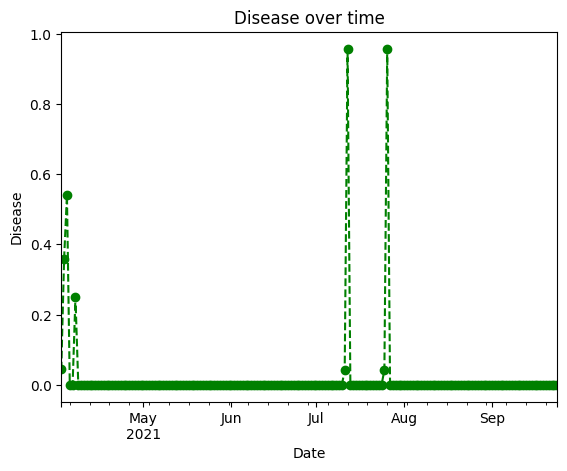

In [209]:
# scatter date rainfall

df.groupby('sample_date')['Disease'].mean().plot(kind='line', color='green',marker='o', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Disease')
plt.title('Disease over time')
plt.show()


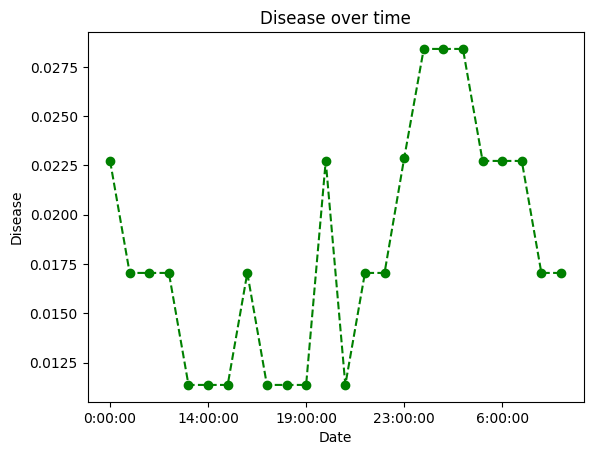

In [210]:
# scatter disease and time

df.groupby('time')['Disease'].mean().plot(kind='line', color='green',marker='o', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Disease')
plt.title('Disease over time')
plt.show()

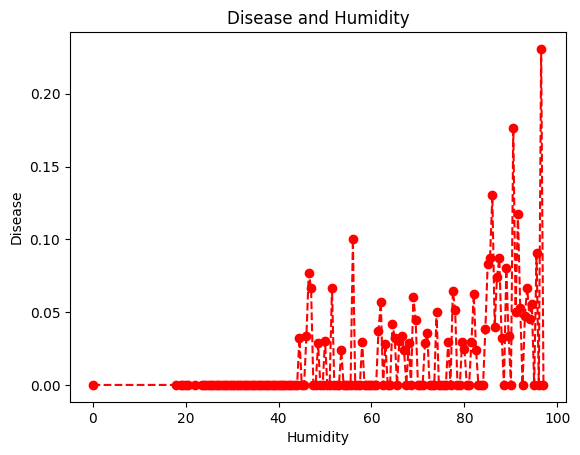

In [211]:
# scatter disease and humidity

df.groupby('rel_hum_hourly')['Disease'].mean().plot(kind='line', color='red',marker='o', linestyle='dashed')
plt.xlabel('Humidity')
plt.ylabel('Disease')
plt.title('Disease and Humidity')
plt.show()


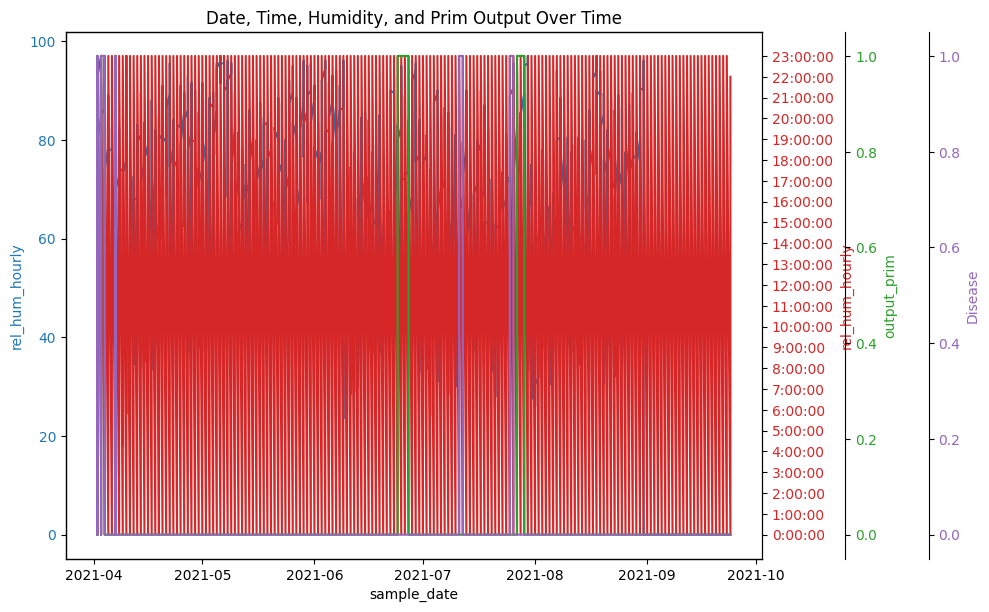

In [212]:
# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting Rainfall
color = 'tab:blue'
ax1.set_xlabel('sample_date')
ax1.set_ylabel('rel_hum_hourly', color=color)
ax1.plot(df['sample_date'], df['rel_hum_hourly'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Creating a secondary y-axis for Temperature
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('rel_hum_hourly', color=color)
ax2.plot(df['sample_date'], df['time'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Creating a third y-axis for Humidity
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))
color = 'tab:green'
ax3.set_ylabel('output_prim', color=color)
ax3.plot(df['sample_date'], df['output_prim'], color=color)
ax3.tick_params(axis='y', labelcolor=color)

# Creating a fourth y-axis for Prim Output
ax4 = ax1.twinx()
ax4.spines['right'].set_position(('outward', 120))
color = 'tab:purple'
ax4.set_ylabel('Disease', color=color)
ax4.plot(df['sample_date'], df['Disease'], color=color)
ax4.tick_params(axis='y', labelcolor=color)

# Adjust layout to prevent clipping of the secondary axes
fig.tight_layout()

plt.title('Date, Time, Humidity, and Prim Output Over Time')
plt.show()

In [213]:
df.rename(columns = {'onset_of_symptoms':'Disease'}, inplace = True)

In [214]:
df['sample_date'] = df['sample_date'].astype('datetime64[ns]')

SPLITTING DATESET

In [215]:
df1 = df.drop("sample_date", axis=1)
P = df1[["Disease"]]
X = df1.drop(["Disease"],axis=1)
Y = df1.drop(["Disease"],axis=1)
x_train,x_test,y_train,y_test = train_test_split(X,P,test_size=0.2,random_state=42)

In [216]:
print(f'Train: {x_train.shape}, {y_train.shape}')
print(f'Test: {x_test.shape}, {y_test.shape}')

Train: (3378, 3), (3378, 1)
Test: (845, 3), (845, 1)


In [217]:
x_train['time'] = x_train['time'].astype('datetime64[ns]')
x_test['time'] = x_test['time'].astype('datetime64[ns]')

x_train['time'] = x_train['time'].dt.hour * 60 + x_train['time'].dt.minute
x_test['time'] = x_test['time'].dt.hour * 60 + x_test['time'].dt.minute

Random forest

In [218]:
rf= RandomForestClassifier(random_state=42)
model_rf = rf.fit(x_train,y_train)
tr_pred_rf = model_rf.predict(x_train)
ts_pred_rf = model_rf.predict(x_test)

print("training accuracy is:",accuracy_score(y_train,tr_pred_rf))
print("testing accuracy is:",accuracy_score(y_test,ts_pred_rf))

training accuracy is: 0.9902309058614565
testing accuracy is: 0.9822485207100592


Logistic Regression

In [219]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
predictions1 = logreg.predict(x_test)
logreg_acc = accuracy_score(y_test, predictions1)
print("Accuracy of the Logistic Regression Model is: ", logreg_acc)

Accuracy of the Logistic Regression Model is:  0.9834319526627219


SVM model

In [220]:
svm_model = SVC(kernel='linear')

# Train the SVM model on the training data
svm_model.fit(x_train, y_train)

# Make predictions on the test data
y_pred = svm_model.predict(x_test)

# Calculate the accuracy of the SVM model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9834319526627219


In [221]:
# Importing libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from collections import Counter
from scipy.stats import mode
from sklearn.svm import SVC
import seaborn as sns
import pandas as pd
import numpy as np

import warnings
# Suppress scikit-learn warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [225]:
df1["time"] = df1["time"].astype("timedelta64[s]")


In [226]:
# value using LabelEncoder
encoder = LabelEncoder()
df1["Disease"] = encoder.fit_transform(df1["Disease"])

X = df1.iloc[:, :-1]
y = df1.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24
)
# Initializing Models
models = {
    "SVC": SVC(),
    "Gaussian NB": GaussianNB(),
    "Random Forest": RandomForestClassifier(random_state=18),
}

# Create pipelines for each model
pipelines = {}
for model_name, model in models.items():
    pipelines[model_name] = Pipeline([("classifier", model)])

# Producing cross-validation score for the models
for model_name, pipeline in pipelines.items():
    scores = cross_val_score(
        pipeline, X, y, cv=10, n_jobs=-1, scoring="accuracy"
    )
    print("=" * 30)
    print(model_name)
    print(f"Scores: {scores}")
    print(f"Mean Score: {np.mean(scores)}")

SVC
Scores: [0.98108747 0.98108747 0.98108747 0.98341232 0.98341232 0.98341232
 0.98104265 0.98104265 0.98104265 0.98104265]
Mean Score: 0.9817669994285906
Gaussian NB
Scores: [0.98108747 0.98108747 0.98108747 0.98341232 0.98341232 0.98341232
 0.98104265 0.98104265 0.98104265 0.98104265]
Mean Score: 0.9817669994285906
Random Forest
Scores: [0.98345154 0.97635934 0.97163121 0.96919431 0.95734597 0.97630332
 0.94075829 0.97630332 0.98104265 0.98104265]
Mean Score: 0.9713432601705263


Accuracy on train data by SVC Classifier: 98.22380106571936
Accuracy on test data by SVC Classifier: 97.98816568047337


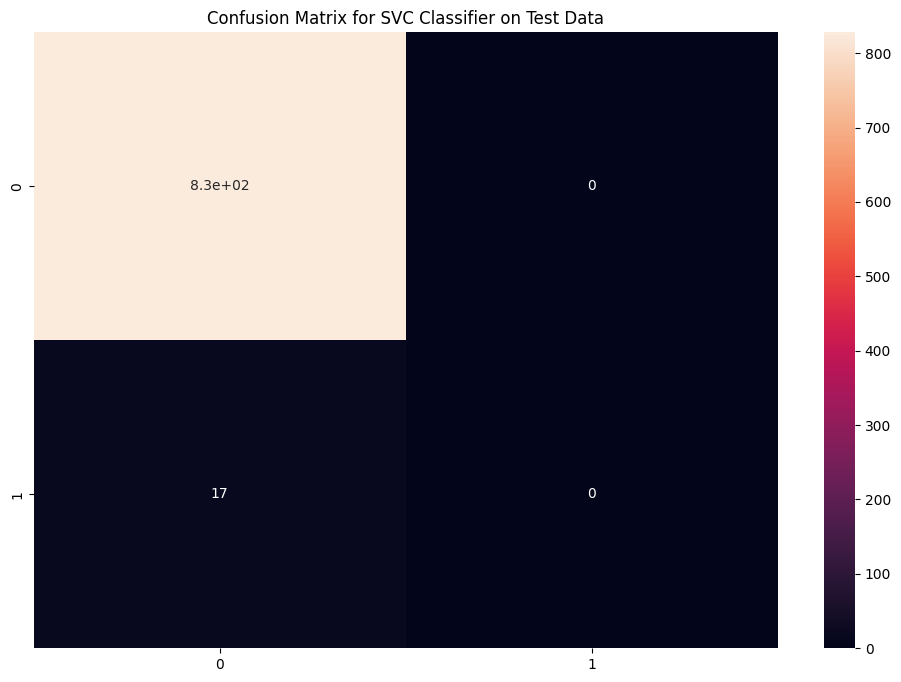

Accuracy on train data by Gaussian NB Classifier: 98.22380106571936
Accuracy on test data by Gaussian NB Classifier: 97.98816568047337


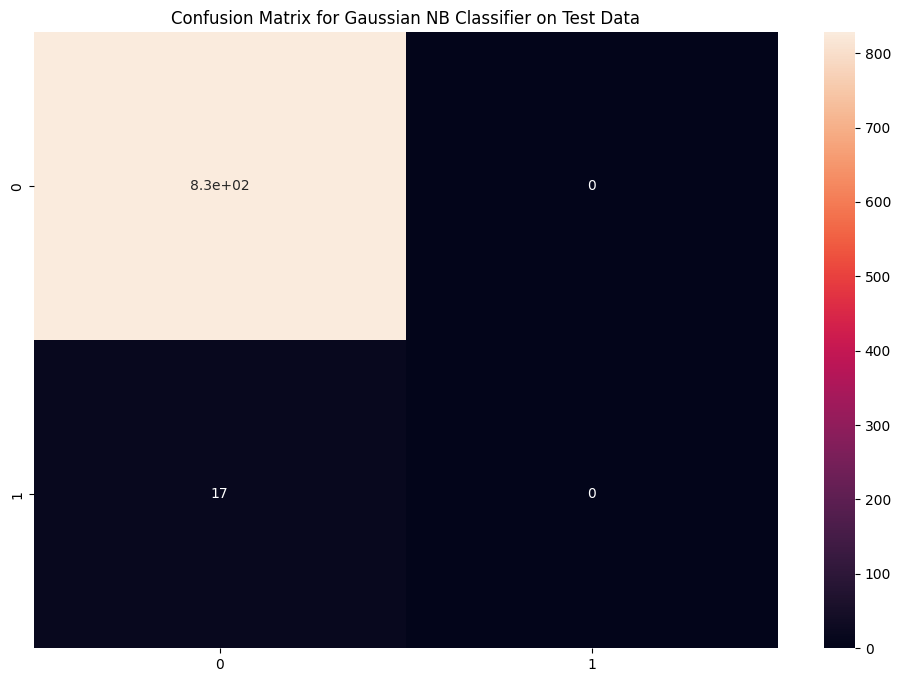

Accuracy on train data by Random Forest Classifier: 99.14150384843103
Accuracy on test data by Random Forest Classifier: 97.15976331360947


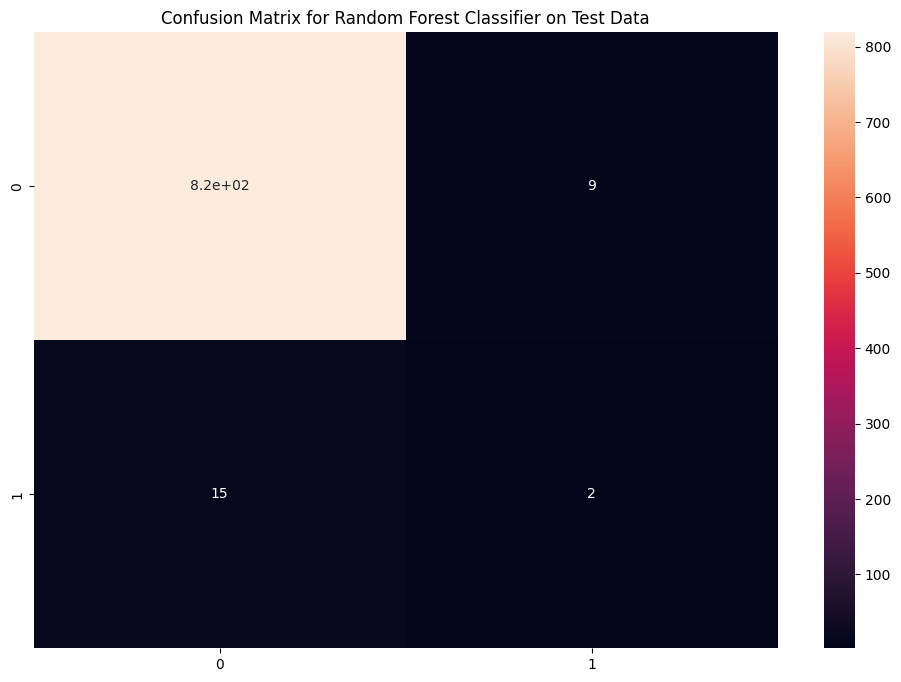

In [227]:
# Training and testing each model
for model_name, pipeline in pipelines.items():
    pipeline.fit(X_train, y_train)
    preds = pipeline.predict(X_test)

    print(f"Accuracy on train data by {model_name} Classifier: {accuracy_score(y_train, pipeline.predict(X_train)) * 100}")
    print(f"Accuracy on test data by {model_name} Classifier: {accuracy_score(y_test, preds) * 100}")

    cf_matrix = confusion_matrix(y_test, preds)
    plt.figure(figsize=(12, 8))
    sns.heatmap(cf_matrix, annot=True)
    plt.title(f"Confusion Matrix for {model_name} Classifier on Test Data")
    plt.show()

In [228]:
# Training the models on whole data
final_svm_model = SVC()
final_nb_model = GaussianNB()
final_rf_model = RandomForestClassifier(random_state=18)

final_svm_model.fit(X, y)
final_nb_model.fit(X, y)
final_rf_model.fit(X, y)


RandomForestClassifier(random_state=18)

Accuracy on Test dataset by the combined model: 97.98816568047337


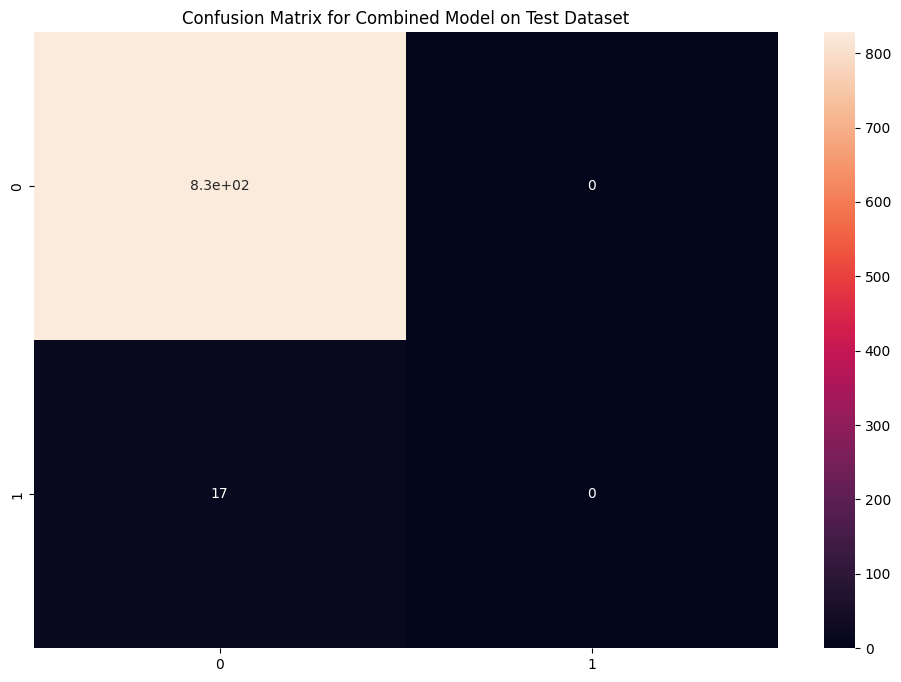

In [229]:
# Making predictions by taking the mode of predictions
# made by all the classifiers
svm_preds = final_svm_model.predict(X_test)
nb_preds = final_nb_model.predict(X_test)
rf_preds = final_rf_model.predict(X_test)

# Use SciPy's mode function
final_preds, _ = mode([svm_preds, nb_preds, rf_preds], axis=0)

# Calculating and printing accuracy on the test dataset
accuracy = accuracy_score(y_test, final_preds) * 100
print(f"Accuracy on Test dataset by the combined model: {accuracy}")

# Visualizing the confusion matrix
cf_matrix = confusion_matrix(y_test, final_preds)
plt.figure(figsize=(12, 8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Combined Model on Test Dataset")
plt.show()